#Figure 8: Nonlinear projections introduce distortions in real data.

In this notebook, we examine the La Manno et al. human forebrain dataset, analyze it using the standard `velocyto` workflow, and investigate the resulting velocity fields and broad trends in cell placement.

Warning: the transition probability and grid arrow calculation is occasionally slow.



# Dependencies

In [3]:
import time
t1 = time.time()

In [4]:
## uncomment this cell if run in colab ##

%%capture
!pip install --upgrade git+https://github.com/meichenfang/velocyto.py.git
!pip install scanpy umap-learn

In [5]:
!mkdir -p figure
!mkdir -p data

Here, the `hgForebrainGlut.loom` and `vis.py` files need to be uploaded.



In [6]:
from vis import * 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [7]:
## run locally ##
# %cd ../../GFCP_2021
# from vis import * 
# %cd notebooks

# Load data and preprocess

In [8]:
vlm = vcy.VelocytoLoom(loom_filepath="data/hgForebrainGlut.loom")
preprocess(vlm)

# Generate Figure 8

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


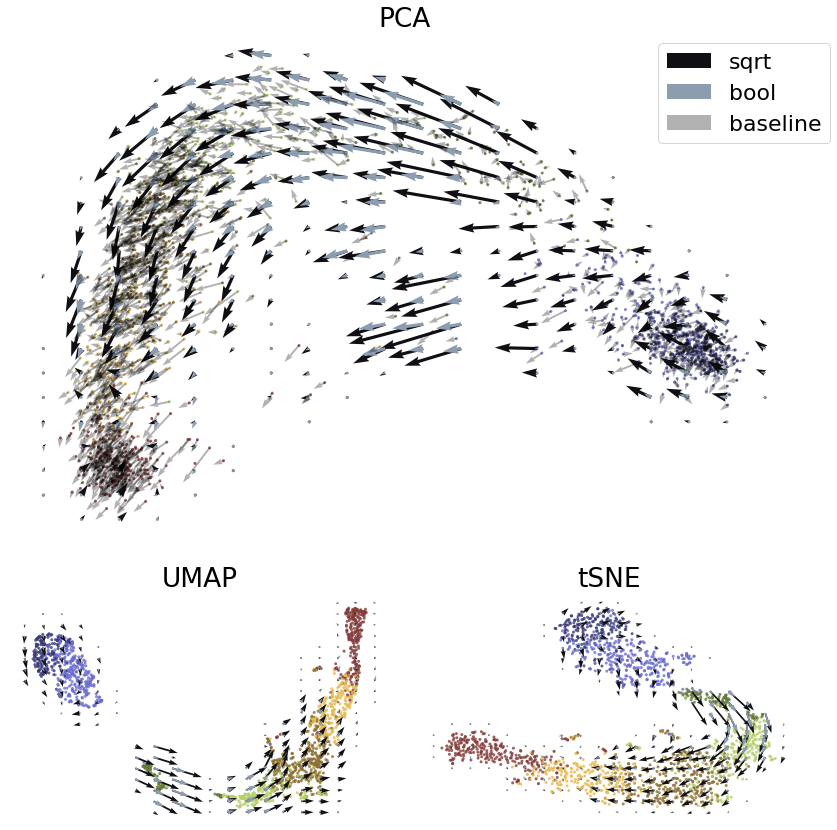

In [9]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(12,12))
ax=[]
steps = (20,20)
ax.append(plt.subplot2grid((3, 2), (0, 0), rowspan=2, colspan=2))
ax.append(plt.subplot2grid((3, 2), (2, 0)))
ax.append(plt.subplot2grid((3, 2), (2, 1)))
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="PCA",sim=False,ax=ax[0],quiver_scale=10,legend=True,steps=steps)
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="UMAP",sim=False,ax=ax[1],quiver_scale=10,legend=False,steps=steps)
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="tSNE",sim=False,ax=ax[2],quiver_scale=10,legend=False,steps=steps)
fig.tight_layout()
fig.savefig('figure/embed_stability_lme.png',dpi=600)

In [10]:
t2 = time.time()
print('Runtime: {:.2f} seconds.'.format(t2-t1))


Runtime: 1113.70 seconds.
